<a href="https://colab.research.google.com/github/ArasHEsLaM1/1-Performance-comparison-of-Gradient-Boosting-algorithms-for-Forex-market-Prediction-A-Study-on-Lig/blob/main/JADI_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# **تغییرات برای تصحیح در پایین کد اصلی آمده**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("housePrice.csv")

# Data visualization and analysis

# Data preprocessing
df = df.dropna(subset=['Address', 'Area'])  # Remove rows with missing address or area
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')  # Convert 'Area' column to numeric values
df = df.dropna(subset=['Area'])  # Remove rows with invalid 'Area' values
df = df[df['Area'] < 10000]  # Filter out unrealistic area values

# Convert binary features to numerical
binary_features = ['Parking', 'Warehouse', 'Elevator']
df[binary_features] = df[binary_features].replace({'دارد': 1, 'ندارد': 0})

# Split the dataset into features (X) and labels (y)
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']]
y_toman = df['Price']
y_dollar = df['Price(USD)']

# Split the data into training and testing sets
X_train, X_test, y_train_toman, y_test_toman, y_train_dollar, y_test_dollar = train_test_split(
    X, y_toman, y_dollar, test_size=0.2, random_state=42
)

# Train a linear regression model for prices in tomans
model_toman = LinearRegression()
model_toman.fit(X_train, y_train_toman)

# Train a linear regression model for prices in dollars
model_dollar = LinearRegression()
model_dollar.fit(X_train, y_train_dollar)

# Predict prices for the test set (in tomans and dollars)
y_pred_toman = model_toman.predict(X_test)
y_pred_dollar = model_dollar.predict(X_test)

# Print the predicted prices for the test set
for i in range(len(X_test)):
    print("Predicted Price (Toman):", y_pred_toman[i])
    print("Predicted Price (Dollar):", y_pred_dollar[i])
    print()


Predicted Price (Toman): 3498987472.3076057
Predicted Price (Dollar): 116632.91573828037

Predicted Price (Toman): 10011416049.490648
Predicted Price (Dollar): 333713.8682442298

Predicted Price (Toman): 19681551608.79454
Predicted Price (Dollar): 656051.7201466225

Predicted Price (Toman): 1481490453.646061
Predicted Price (Dollar): 49383.01503598117

Predicted Price (Toman): 2553786252.2252693
Predicted Price (Dollar): 85126.20840947508

Predicted Price (Toman): 5171266553.991737
Predicted Price (Dollar): 172375.5517815513

Predicted Price (Toman): 1857980567.856596
Predicted Price (Dollar): 61932.68561925061

Predicted Price (Toman): 767363775.4539022
Predicted Price (Dollar): 25578.792547552177

Predicted Price (Toman): 4735019837.030659
Predicted Price (Dollar): 157833.99455287194

Predicted Price (Toman): 3701248319.7860928
Predicted Price (Dollar): 123374.94434971185

Predicted Price (Toman): 8193721395.486158
Predicted Price (Dollar): 273124.04645806574

Predicted Price (Toman)


1. ابتدا کتابخانه ها را وارد میکنیم
  
2. فایل را با استفاده از پانداس میخوانیم و در  df میریزیم
3. دیتا را پیش پردازش میکنیم که برای پاس دادن به مدل آماده باشد
4. دیتا ست را به دو قسمت با سایز 70% بع 30 % تقسیم میکنیم
5. مدل را ترین میکنیم


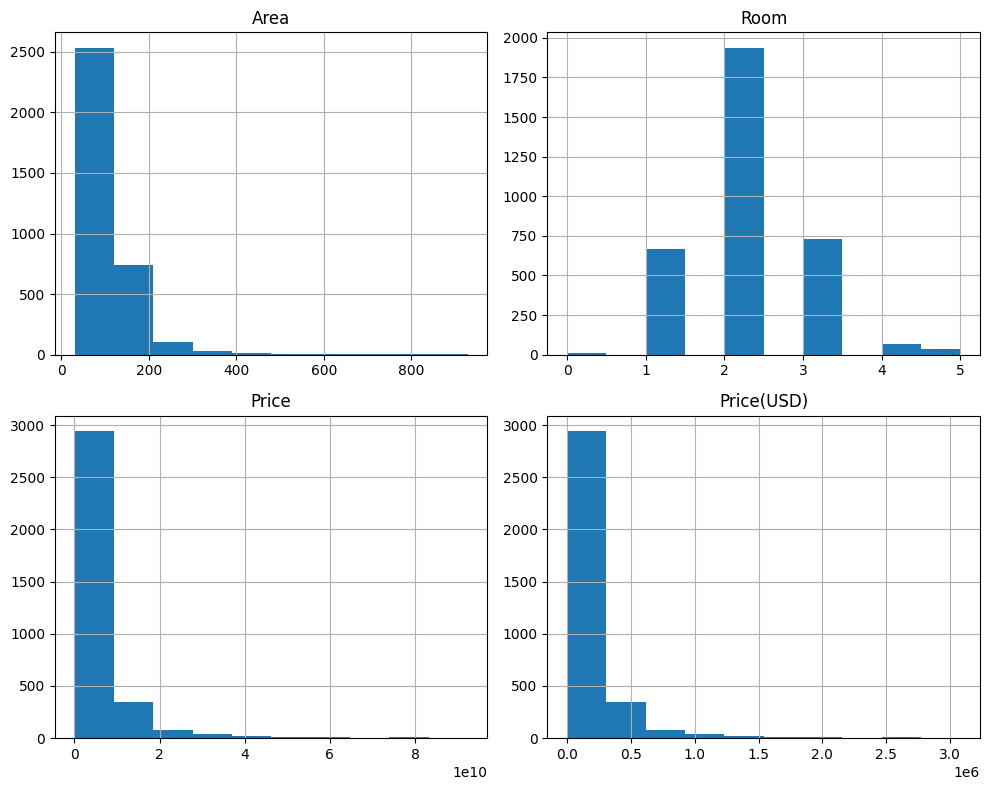

In [4]:
# Visualize histograms of all features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


<ipython-input-5-790afd2692f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


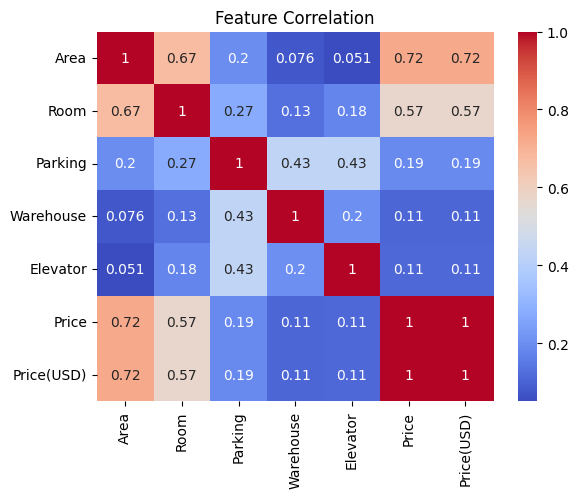

In [5]:
# Analyze feature correlations
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


**اسکتر پلات**

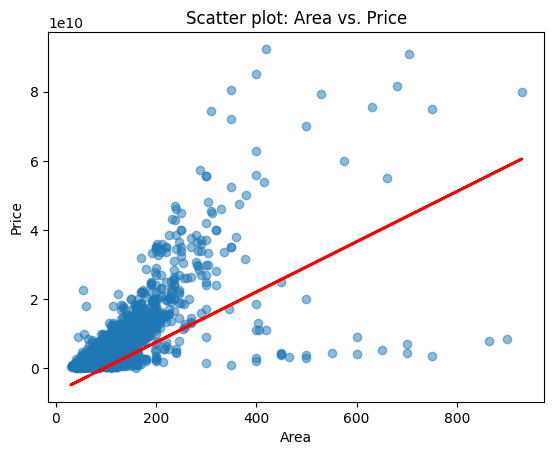

In [7]:
# Scatter plot of Area vs. Price
plt.scatter(df['Area'], df['Price'], alpha=0.5)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Scatter plot: Area vs. Price")

# Add a regression line
regression_line = model_toman.coef_[0] * df['Area'] + model_toman.intercept_
plt.plot(df['Area'], regression_line, color='red', linewidth=2)

plt.show()

In [9]:

from sklearn.metrics import mean_squared_error

# Evaluate the model (in tomans)
mse_toman = mean_squared_error(y_test_toman, y_pred_toman)
print("Mean Squared Error (Toman):", mse_toman)

# Evaluate the model (in dollars)
mse_dollar = mean_squared_error(y_test_dollar, y_pred_dollar)
print("Mean Squared Error (Dollar):", mse_dollar)


Mean Squared Error (Toman): 3.540929461856838e+19
Mean Squared Error (Dollar): 39343660714.72043
